## 통계적학습개론 3강 노트

* <h3> Auto data polynomial regression </h3>

In [147]:
library(ISLR)
library(MASS)
library(ggplot2)

In [8]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


mpg  갤런 당 마일(연비)  
cylinders 4 개에서 8 개 사이의 실린더 수  
displacement 엔진 배기량 (cu. 인치)  
horsepower 엔진 마력  
weight  차량 중량 (lbs.)  
acceleration 0 ~ 60mph (초)에서 가속하는 데 걸리는 시간  
year 모델 연도 (모듈로 100)  
origin 자동차의 유래 (1. 미국, 2. 유럽, 3. 일본)  
name 차량 이름  

In [137]:
# 1차
lm.fit <- lm(mpg~horsepower, data=Auto)

In [175]:
coef(lm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [150]:
# 2차
poly.fit <- lm(mpg~horsepower+I(horsepower^2)+I(horsepower^3), data=Auto)

Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'raw' will be disregarded"


In [171]:
#4차
poly.fit4 <- lm(mpg~poly(horsepower,4), data=Auto)

In [71]:
#10차
poly.fit10 <- lm(mpg~poly(horsepower,10), data=Auto)

In [172]:
summary(poly.fit4)


Call:
lm(formula = mpg ~ poly(horsepower, 4), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8820  -2.5802  -0.1682   2.2100  16.1434 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2209 106.161   <2e-16 ***
poly(horsepower, 4)1 -120.1377     4.3727 -27.475   <2e-16 ***
poly(horsepower, 4)2   44.0895     4.3727  10.083   <2e-16 ***
poly(horsepower, 4)3   -3.9488     4.3727  -0.903    0.367    
poly(horsepower, 4)4   -5.1878     4.3727  -1.186    0.236    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.373 on 387 degrees of freedom
Multiple R-squared:  0.6893,	Adjusted R-squared:  0.6861 
F-statistic: 214.7 on 4 and 387 DF,  p-value: < 2.2e-16


In [156]:
summary(poly.fit4)


Call:
lm(formula = mpg ~ poly(horsepower, 4, raw = F), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8820  -2.5802  -0.1682   2.2100  16.1434 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     23.4459     0.2209 106.161   <2e-16 ***
poly(horsepower, 4, raw = F)1 -120.1377     4.3727 -27.475   <2e-16 ***
poly(horsepower, 4, raw = F)2   44.0895     4.3727  10.083   <2e-16 ***
poly(horsepower, 4, raw = F)3   -3.9488     4.3727  -0.903    0.367    
poly(horsepower, 4, raw = F)4   -5.1878     4.3727  -1.186    0.236    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.373 on 387 degrees of freedom
Multiple R-squared:  0.6893,	Adjusted R-squared:  0.6861 
F-statistic: 214.7 on 4 and 387 DF,  p-value: < 2.2e-16


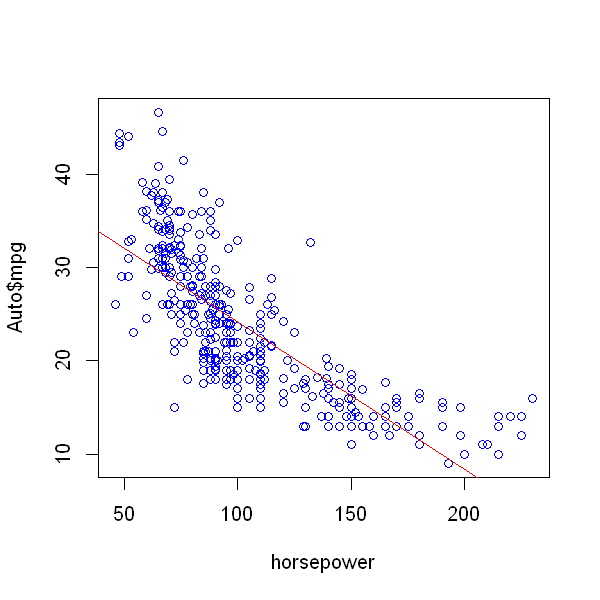

In [146]:
options(repr.plot.width=5, repr.plot.height=5) # plot size 조정
plot(Auto$mpg~horsepower, col="blue")
abline(coef = coef(lm.fit), col='red')

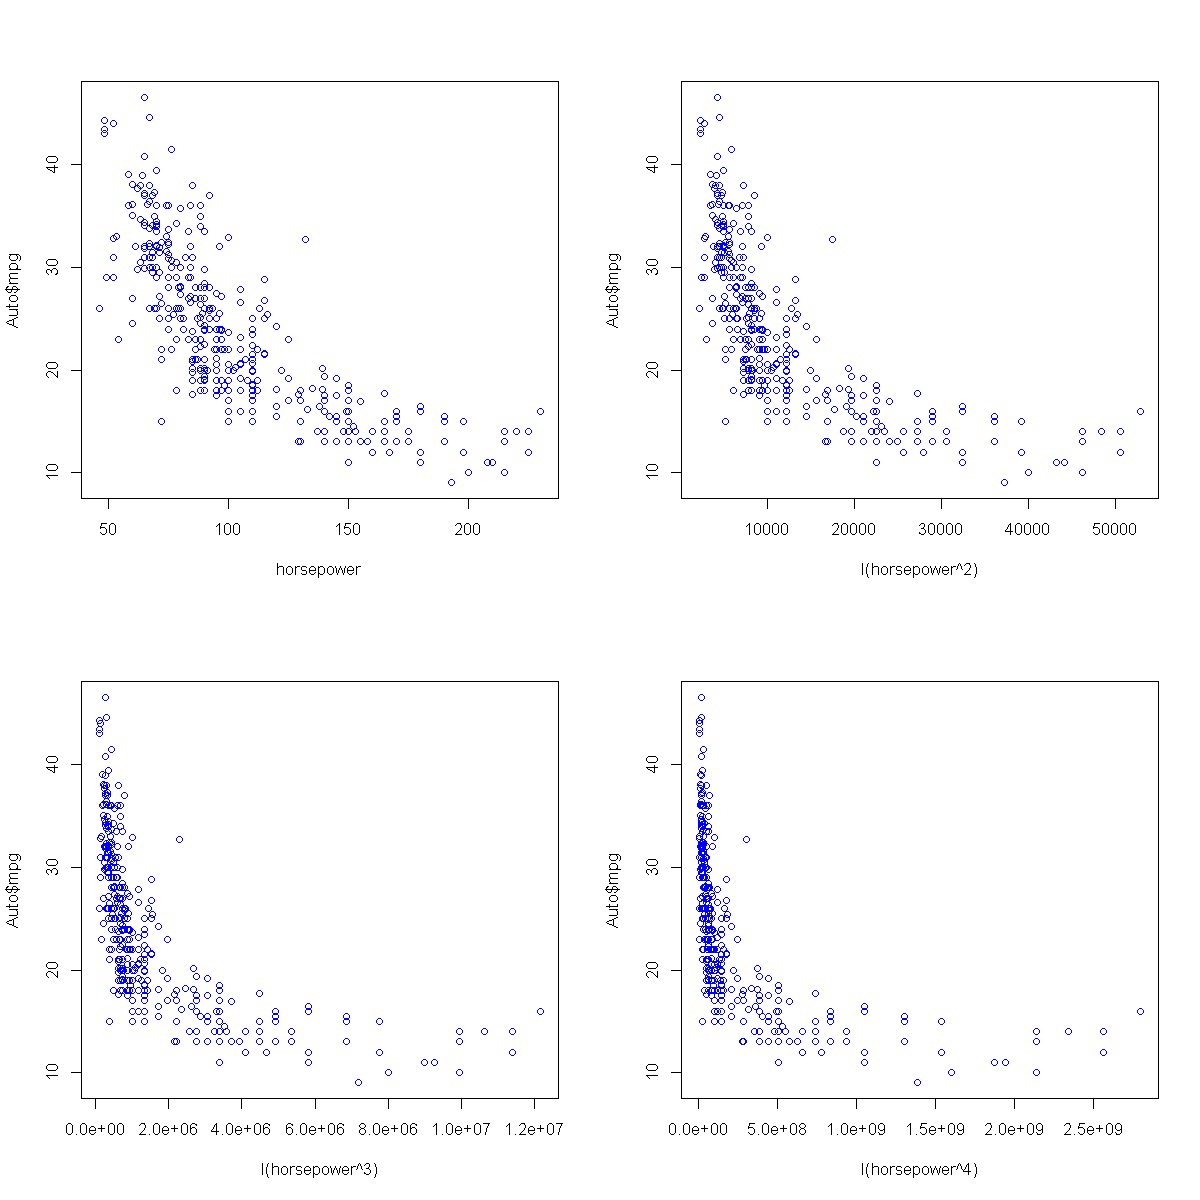

In [169]:
par(mfrow=c(2,2)) # row, column 조정
plot(Auto$mpg ~ horsepower+I(horsepower^2)+I(horsepower^3)+I(horsepower^4), col="blue")
options(repr.plot.width=10, repr.plot.height=10) # plot size 조정

In [160]:
# 4차 다항식
poly.fit <- lm(mpg~poly(horsepower,4,raw=F), data=Auto)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



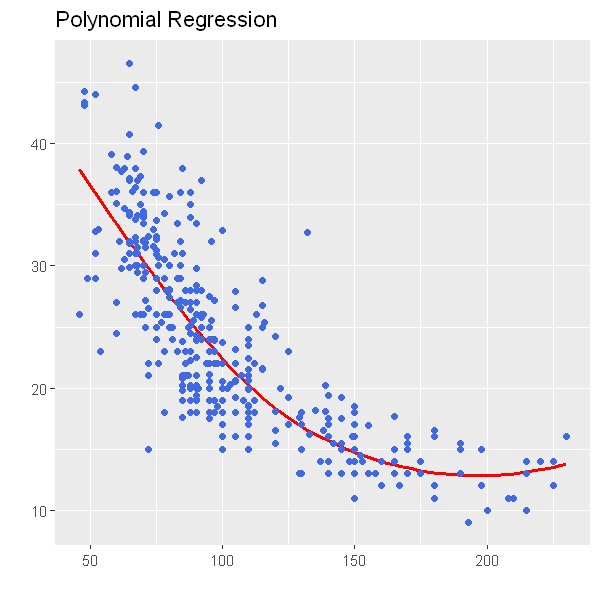

In [159]:
par(mfrow=c(1,1))
ggplot(Auto) + 
    geom_smooth(aes(x=horsepower, y=predict(poly.fit,Auto)), col='red' ) +
    geom_point(aes(x=horsepower, y=mpg), col='royalblue') + 
    ylab("") + xlab("") + ggtitle("Polynomial Regression") 
options(repr.plot.width=5, repr.plot.height=5) 

* <h3> Train vs Test Error </h3>